In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
#batch size
bs = 64

In [4]:
doc(untar_data)

In [6]:
doc(URLs)

In [7]:
dest = 'data/dogandcatlesson1'
path = untar_data(URLs.PETS,dest=dest)
path

PosixPath('data/dogandcatlesson1/oxford-iiit-pet')

In [10]:
path.ls()

[PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images'),
 PosixPath('data/dogandcatlesson1/oxford-iiit-pet/annotations')]

In [12]:
path_img = path.ls()[0]
path_anno = path.ls()[1]

In [15]:
doc(get_image_files)

In [30]:
imglist = get_image_files(path_img)
fnames = imglist = get_image_files(path_img)

In [31]:
imglist[:5]

[PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images/wheaten_terrier_61.jpg'),
 PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images/newfoundland_108.jpg'),
 PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images/Russian_Blue_239.jpg'),
 PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images/havanese_152.jpg'),
 PosixPath('data/dogandcatlesson1/oxford-iiit-pet/images/Siamese_14.jpg')]

In [32]:
np.random.seed(2)
pat = r'([^/]+)\_\d+.jpg$'

In [33]:
data = ImageDataBunch.from_name_re(path = path_img, fnames = fnames, pat = pat,
                                   size = 224, ds_tfms = get_transforms(), bs = bs)
data = data.normalize(imagenet_stats)

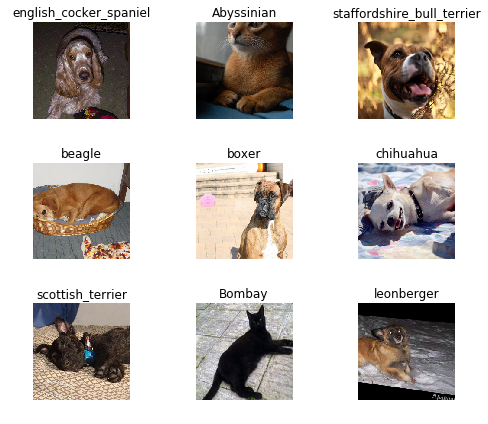

In [34]:
data.show_batch(rows = 3, figsize=(7,6))

In [37]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [38]:
data.c

37

In [39]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [40]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [41]:
learn.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         1.325602    0.338781    0.103518    00:33     
1         0.551005    0.245971    0.085250    00:31     
2         0.332204    0.228394    0.080514    00:31     
3         0.254635    0.211710    0.075778    00:31     


In [42]:
learn.save('stage-1')